# Simple Stellar Structure

## homework #1 solutions

I'm using SymPy -- the symbolic math library for python -- to do the algebra here.  The next 2 cells load SymPy for interactive work and define the variables we are going to use (and treat as math symbols)

In [1]:
from sympy import init_session
init_session()
%matplotlib inline

IPython console for SymPy 1.11.1 (Python 3.10.6-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [2]:
rho = symbols('rho', cls=Function)
qc = symbols('q_c')
pc = symbols('p_c')
G = symbols('G')
Mstar, Rstar = symbols('M_\star R_\star')
r = symbols('r')
xi = symbols('xi')
beta = symbols('beta')

# 1.

Consider a mass profile in a star:

$$m(r) = 4\pi R^3 \beta \left [-\frac{r \cos(\pi r / R)}{\pi R} + \frac{\sin(\pi r /R)}{\pi^2}\right ]$$

where $\beta$ is a constant

## a. 

What is the density profile, $\rho(r)$, that gives rise to this mass?

First let's plot the function $m(r)$

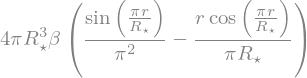

In [3]:
m = 4*pi*Rstar**3*beta*(-r * cos(pi*r/Rstar) / (pi * Rstar) + sin(pi*r/Rstar) / pi**2)
m

let's define

$$\xi = \frac{r}{R}$$

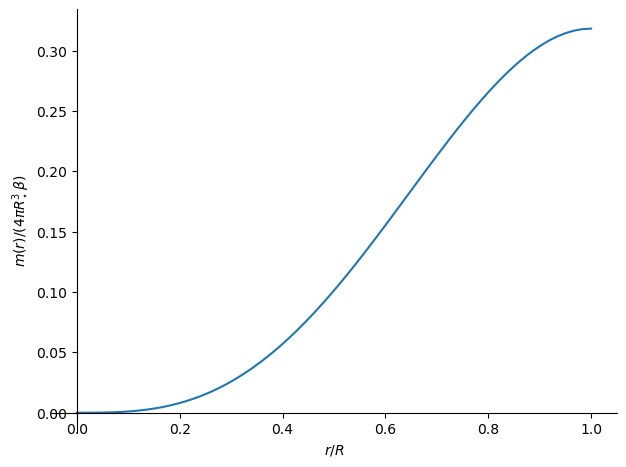

In [4]:
# to plot it, we need to make it dimensionless
z = (m/(4*pi*Rstar**3*beta)).subs(r, xi*Rstar)
plot(z, (xi, 0, 1), xlabel=r"$r/R$", ylabel=r"$m(r)/(4\pi R_\star^3\beta)$")

We see that the mass monotonically increases toward the surface, we we expect.  Further, $m(r=0) = 0$, as expected.

Now we get the density as

$$\rho = \frac{1}{4\pi r^2} \frac{dM}{dr}$$


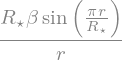

In [5]:
rho = m.diff(r, 1)/(4*pi*r**2)
rho = simplify(rho)
rho

## b.

What is $\beta$ in terms of the central density?

The central density is just $\rho(0)$, but we because of the form of $\rho(r)$ here, we need to consider the limit:

$$\rho_c = \lim_{r \rightarrow 0} \rho(r)$$

In [6]:
rhoc = rho.limit(r, 0)
rhoc

So $\beta = \rho_c/\pi$.  We can rewrite the density in terms of $\rho_c$ now

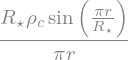

In [7]:
rhoc = symbols("rho_c")
rho = simplify(rho.subs(beta, rhoc/pi))
rho

We can also rewrite the mass, $m(r)$, in terms of $\rho_c$:

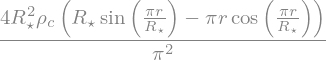

In [8]:
m = simplify(m.subs(beta, rhoc/pi))
m

Notice that the density vanishes at $r = R_\star$.  Now let's plot this.  

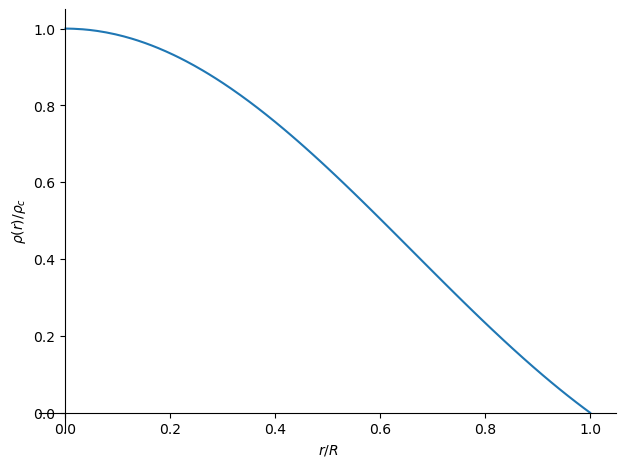

In [9]:
z = simplify((rho/rhoc).subs(r, xi*Rstar))
plot(z, (xi, 0, 1), xlabel=r"$r/R$", ylabel=r"$\rho(r)/\rho_c$")

## c.

What is the ratio of the central density to the average density, $\rho_c / \bar{\rho}$?

The average density is just the total mass divided by the volume of the star.  First we get the total mass, $M_\star = m(R_\star)$

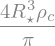

In [10]:
Mstar = m.subs(r, Rstar)
Mstar

and now we compute

$$\bar{\rho} = \frac{M_\star}{(4/3) \pi R_\star^3}$$


In [11]:
rhobar = symbols(r"\bar{\rho}")
rhobar = Mstar / (Rational(4,3)*pi*Rstar**3)
rhobar

So 

$$\frac{\rho_c}{\bar{\rho}} = \frac{\pi^2}{3}$$

Alternately, we can do a volume-weighted average of $\rho(r)$:

$$\bar{\rho} = \frac{1}{V} \int_0^R 4\pi r^2 \rho(r) dr$$


In [12]:
integrate(4*pi*r**2*rho, (r, 0, Rstar)) / (Rational(4,3)*pi*Rstar**3)

# 2.

Now we consider:

$$\rho(r) = \rho_c (1 - r/R_\star)$$

## a. 

What is the central density in terms of the total mass?

We need an expression for $m(r)$:

$$m(r) = 4\pi \int_0^r r^2 \rho(r) dr$$

So we start with this integral

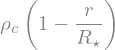

In [13]:
rho = rhoc * (1 - r/Rstar)
rho

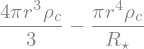

In [14]:
m = integrate(4*pi*xi**2 * rho.subs(r, xi), (xi, 0, r))
m

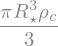

In [15]:
M = m.subs(r, Rstar)
M

and then we can find $\rho_c$ in terms of $M$:

In [16]:
Mstar = symbols("M_\star")

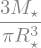

In [17]:
rc = solve(Eq(M, Mstar), rhoc)[0]
rc

## b.

Now we can integrate HSE.  We will do this as

$$P(R) - P(0) = \int_0^{R_\star} \frac{-Gm(r)}{r^2} \rho dr$$

Here I've written the integral in terms of $r$.

Note that since $P(R) = 0$, this is just

$$P_c = \int_0^{R_\star} \frac{Gm(r)}{r^2} \rho dr$$

We'll substitute in our expressions for $m(r)$ and $\rho(r)$ in the integrand.

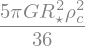

In [24]:
pc = symbols("p_c")
pc = integrate(G*m/r**2*rho, (r, 0, Rstar))
pc

This is $p_c$ in terms of $\rho_c$, but we can substitute in find the total mass of the star easily:

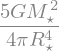

In [25]:
pc.subs(rhoc, rc)

From this expression, we see that $f = 5/(4\pi)$.

## c.

What is the total gravitational potential energy, $\Omega$, of the star?

We integrate

$$\Omega = -\int_0^{M_\star} \frac{Gm(r)}{r} dm = -\int_0^{R_\star} \frac{G m(r)}{r} 4\pi r^2 \rho dr$$

To do this, we use our expression for $m(r)$ and $\rho(r)$

In [21]:
Omega = symbols("Omega")
Omega = integrate(-G*m*4*pi*r*rho, (r, 0, Rstar))

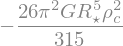

In [22]:
Omega

We can rewrite this in terms of mass by eliminating $\rho_c$:

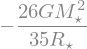

In [23]:
Omega = Omega.subs(rhoc, rc)
Omega

So this shows that $\alpha = 26/35$.